In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [35]:
# Frequenze associate (devi inserire le frequenze corrispondenti ai file CSV)
frequenze = [0, 50, 100, 200, 300, 500, 800, 1000, 2000, 5000, 10000]  # Frequenze corrispondenti ai file CSV

# Lista per memorizzare i guadagni
guadagni_db = []

# Percorso dove si trovano i file CSV
file_pattern = "*.csv"  # Assicurati che i file abbiano nomi chiari come 10Hz.csv, 100Hz.csv, etc.


In [36]:
# Ciclo su ciascun file CSV corrispondente a una frequenza
for freq in frequenze:
    # Costruisce il nome del file per la frequenza corrente
    filename = f"Rec{freq}Hz.csv"
    
    # Carica i dati dal CSV
    data = pd.read_csv(filename, header=None, skiprows=1)
    
    # Estrai le colonne ingresso e uscita
    ingresso = data[0].values  # Un singolo valore per ciascun file
    uscita = data[1].values      # Un singolo valore per ciascun file
    
    # Seleziona i top 10 valori di ingresso e gli indici corrispondenti
    top_n = 1000
    top_n_indices = np.argsort(np.abs(ingresso))[-top_n:]  # Indici dei 10 valori più grandi
    
    # Prendi i valori dell'ingresso e dell'uscita corrispondenti ai top 10 indici
    ampiezza_ingresso = np.mean(np.abs(ingresso[top_n_indices]))
    ampiezza_uscita = np.mean(np.abs(uscita[top_n_indices]))
    
    # Calcola il guadagno in dB per questa frequenza
    guadagno = 20 * np.log10(ampiezza_uscita / ampiezza_ingresso)
    guadagni_db.append(guadagno)  # Salva il guadagno

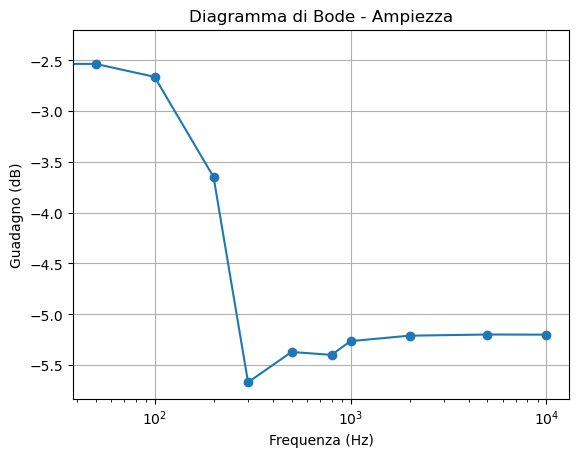

In [37]:
# Plot del diagramma di Bode
plt.figure()
plt.semilogx(frequenze, guadagni_db, marker='o')  # Usa scala logaritmica per le frequenze
plt.title('Diagramma di Bode - Ampiezza')
plt.xlabel('Frequenza (Hz)')
plt.ylabel('Guadagno (dB)')
plt.grid(True)
plt.show()

In [32]:
# Stampa i guadagni calcolati
for freq, gain in zip(frequenze, guadagni_db):
    print(f"Frequenza: {freq} Hz - Guadagno: {gain:.2f} dB")
    

Frequenza: 0 Hz - Guadagno: -2.04 dB
Frequenza: 50 Hz - Guadagno: -2.46 dB
Frequenza: 100 Hz - Guadagno: -2.58 dB
Frequenza: 200 Hz - Guadagno: -3.98 dB
Frequenza: 300 Hz - Guadagno: -5.20 dB
Frequenza: 500 Hz - Guadagno: -5.38 dB
Frequenza: 800 Hz - Guadagno: -5.32 dB
Frequenza: 1000 Hz - Guadagno: -5.25 dB
Frequenza: 2000 Hz - Guadagno: -5.19 dB
Frequenza: 5000 Hz - Guadagno: -5.19 dB
Frequenza: 10000 Hz - Guadagno: -5.17 dB
